In [1]:
#Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Membaca dataset
df = pd.read_csv('ObesityDataSet.csv')

In [3]:
#Menampilkan 5 baris pertama
print("Lima baris pertama dataset:")

display(df.head())

Lima baris pertama dataset:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
#Menampilkan jumlah baris dan kolom
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

Jumlah baris: 2111
Jumlah kolom: 17


In [5]:
#Menampilkan informasi dataset
print("Informasi umum dataset:")
df.info()

Informasi umum dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                     

In [6]:
#Menampilkan deskripsi statistik untuk kolom numerik dan kolom kategori
print("Statistik deskriptif untuk kolom numerik:")
display(df.describe())

print("\nStatistik deskriptif untuk kolom kategori (object):")
display(df.describe(include='object'))

Statistik deskriptif untuk kolom numerik:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351



Statistik deskriptif untuk kolom kategori (object):


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


In [7]:
#Menampilkan unique value setiap kolom
print("Nilai unik untuk setiap kolom:")
for column in df.columns:
    unique_values = df[column].unique()
    num_unique = len(unique_values)
    print(f"\nKolom: {column} ({num_unique} nilai unik)")
    print(unique_values)

Nilai unik untuk setiap kolom:

Kolom: Age (1395 nilai unik)
['21' '23' '27' ... '22.524036' '24.361936' '23.664709']

Kolom: Gender (4 nilai unik)
['Female' 'Male' '?' nan]

Kolom: Height (1563 nilai unik)
['1.62' '1.52' '1.8' ... '1.752206' '1.73945' '1.738836']

Kolom: Weight (1519 nilai unik)
['64' '56' '77' ... '133.689352' '133.346641' '133.472641']

Kolom: CALC (6 nilai unik)
['no' 'Sometimes' 'Frequently' '?' 'Always' nan]

Kolom: FAVC (4 nilai unik)
['no' 'yes' '?' nan]

Kolom: FCVC (809 nilai unik)
['2' '3' '1' nan '?' '8.148992744163786' '8.42397392777979' '2.450218'
 '2.880161' '2.00876' '2.596579' '2.591439' '2.392665' '1.123939'
 '2.027574' '2.658112' '2.88626' '2.714447' '2.750715' '1.4925' '2.205439'
 '2.059138' '2.310423' '2.823179' '2.052932' '2.596364' '2.767731'
 '2.815157' '2.737762' '2.524428' '2.971574' '1.0816' '1.270448'
 '1.344854' '2.959658' '2.725282' '2.844607' '2.44004' '2.432302'
 '2.592247' '2.449267' '2.929889' '2.015258' '1.031149' '1.592183'
 '1.21498

In [8]:
#Ganti '?' dengan NaN
df.replace('?', np.nan, inplace=True)

#Cek missing value
print("\nJumlah missing value:")
missing = df.isnull().sum()
print(missing)


Jumlah missing value:
Age                               22
Gender                            22
Height                            22
Weight                            19
CALC                              20
FAVC                              22
FCVC                              18
NCP                               22
SCC                               18
SMOKE                             13
CH2O                              15
family_history_with_overweight    23
FAF                               19
TUE                               15
CAEC                              18
MTRANS                            12
NObeyesdad                         0
dtype: int64


In [9]:
#Mengubah kolom ke numerik yang awalnya kategorikal
columns_to_numeric = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

for col in columns_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("\nInformasi umum dataset setelah konversi tipe data:")
df.info()


Informasi umum dataset setelah konversi tipe data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2089 non-null   float64
 1   Gender                          2089 non-null   object 
 2   Height                          2089 non-null   float64
 3   Weight                          2092 non-null   float64
 4   CALC                            2091 non-null   object 
 5   FAVC                            2089 non-null   object 
 6   FCVC                            2093 non-null   float64
 7   NCP                             2089 non-null   float64
 8   SCC                             2093 non-null   object 
 9   SMOKE                           2098 non-null   object 
 10  CH2O                            2096 non-null   float64
 11  family_history_with_overweight  2088 non-nu

In [10]:
#Menampilkan deskripsi statistik setelah konversi
print("Statistik deskriptif untuk kolom numerik:")
display(df.describe())

print("\nStatistik deskriptif untuk kolom kategori (object):")
display(df.describe(include='object'))

Statistik deskriptif untuk kolom numerik:


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2089.000000,2089.000000,2092.000000,2093.000000,2089.000000,2096.000000,2092.000000,2096.000000
mean,24.717928,1.706623,88.608184,2.443519,2.729418,2.030560,1.073435,0.680138
std,8.391323,0.117700,36.154617,0.642754,0.981124,0.737945,1.149364,0.717160
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.955257,1.630000,66.000000,2.000000,2.675411,1.569911,0.129009,0.000000
50%,22.814657,1.701284,83.000000,2.397284,3.000000,2.000000,1.000000,0.625360
75%,26.000000,1.770000,108.055736,3.000000,3.000000,2.482454,1.683612,1.000000
max,106.441252,2.853986,441.131078,8.706795,12.299828,9.233294,12.270275,7.669504



Statistik deskriptif untuk kolom kategori (object):


,Gender,CALC,FAVC,SCC,SMOKE,family_history_with_overweight,CAEC,MTRANS,NObeyesdad
count,2089,2091,2089,2093,2098,2088,2093,2099,2111
unique,2,4,2,2,2,2,4,5,7
top,Male,Sometimes,yes,no,no,yes,Sometimes,Public_Transportation,Obesity_Type_I
freq,1056,1386,1844,1997,2054,1705,1747,1572,351


In [11]:
#Konfirmasi unique value setiap kolom
print("Nilai unik untuk setiap kolom setelah '?' diganti:")
for column in df.columns:
    unique_values = df[column].unique()
    num_unique = len(unique_values)
    print(f"\nKolom: {column} ({num_unique} nilai unik)")
    print(unique_values)

Nilai unik untuk setiap kolom setelah '?' diganti:

Kolom: Age (1394 nilai unik)
[21.       23.       27.       ... 22.524036 24.361936 23.664709]

Kolom: Gender (3 nilai unik)
['Female' 'Male' nan]

Kolom: Height (1562 nilai unik)
[1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]

Kolom: Weight (1518 nilai unik)
[ 64.        56.        77.       ... 133.689352 133.346641 133.472641]

Kolom: CALC (5 nilai unik)
['no' 'Sometimes' 'Frequently' nan 'Always']

Kolom: FAVC (3 nilai unik)
['no' 'yes' nan]

Kolom: FCVC (808 nilai unik)
[2.         3.         1.                nan 8.14899274 8.42397393
 2.450218   2.880161   2.00876    2.596579   2.591439   2.392665
 1.123939   2.027574   2.658112   2.88626    2.714447   2.750715
 1.4925     2.205439   2.059138   2.310423   2.823179   2.052932
 2.596364   2.767731   2.815157   2.737762   2.524428   2.971574
 1.0816     1.270448   1.344854   2.959658   2.725282   2.844607
 2.44004    2.432302   2.592247   2.449267   2.929889   2.01525

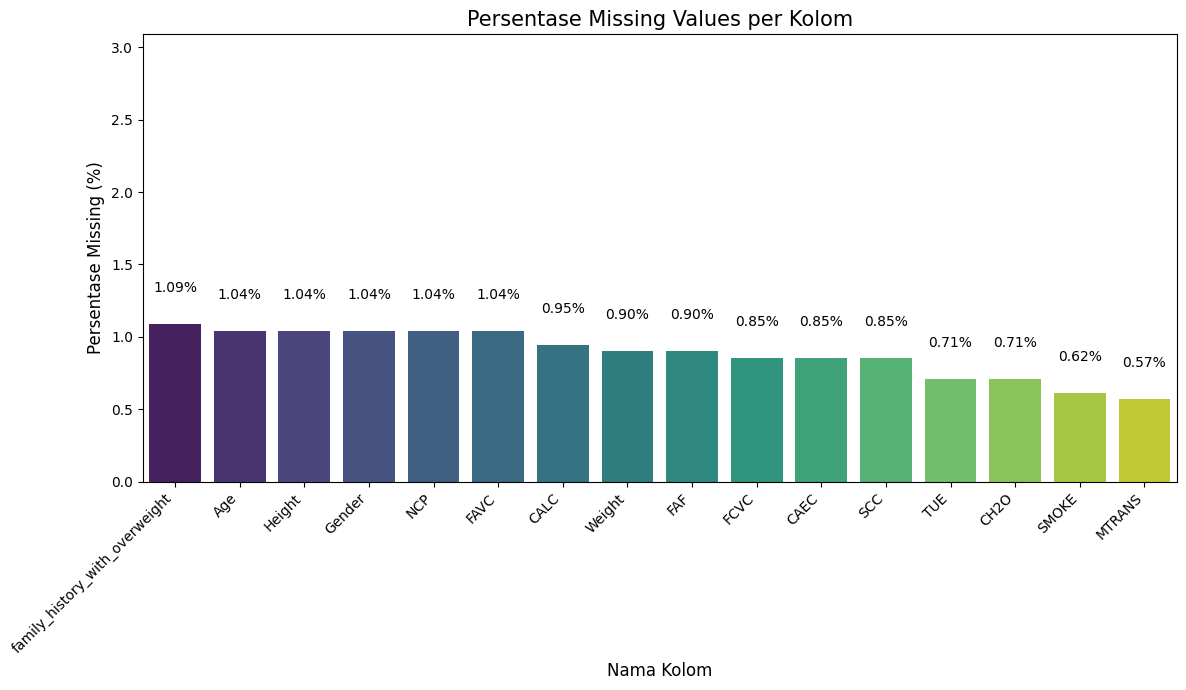

In [12]:
#Visualisasi persentase missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values, hue=missing_percentage.index, palette="viridis", legend=False)
plt.xticks(rotation=45, ha="right")
plt.title('Persentase Missing Values per Kolom', fontsize=15)
plt.xlabel('Nama Kolom', fontsize=12)
plt.ylabel('Persentase Missing (%)', fontsize=12)
plt.ylim(0, max(missing_percentage.values) + 2)

for i, v in enumerate(missing_percentage.values):
    plt.text(i, v + 0.2, f"{v:.2f}%", color='black', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Kolom Numerik: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


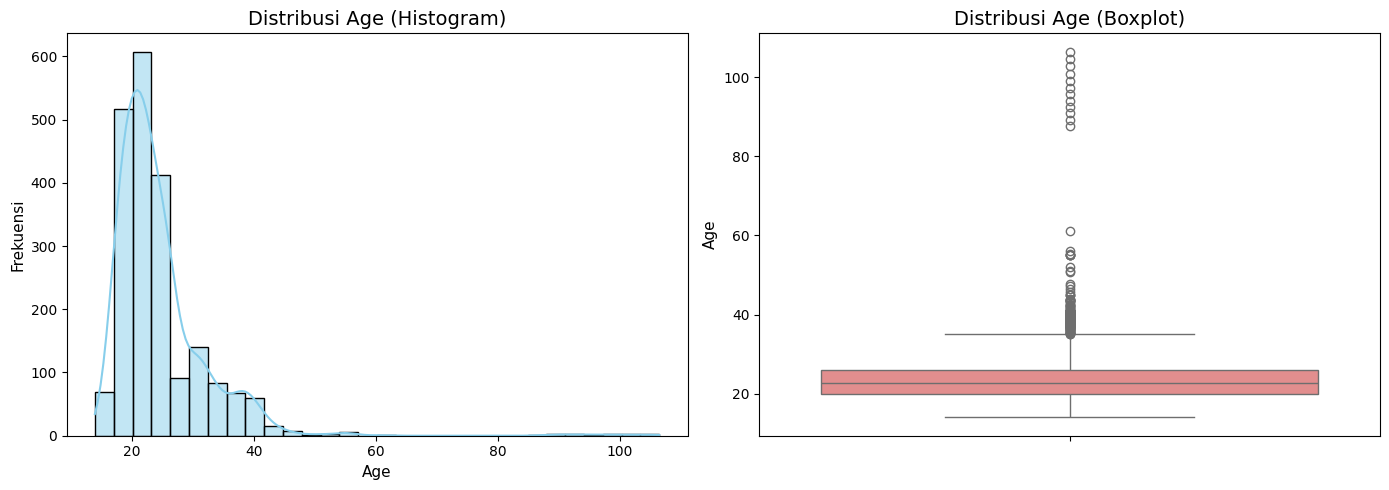

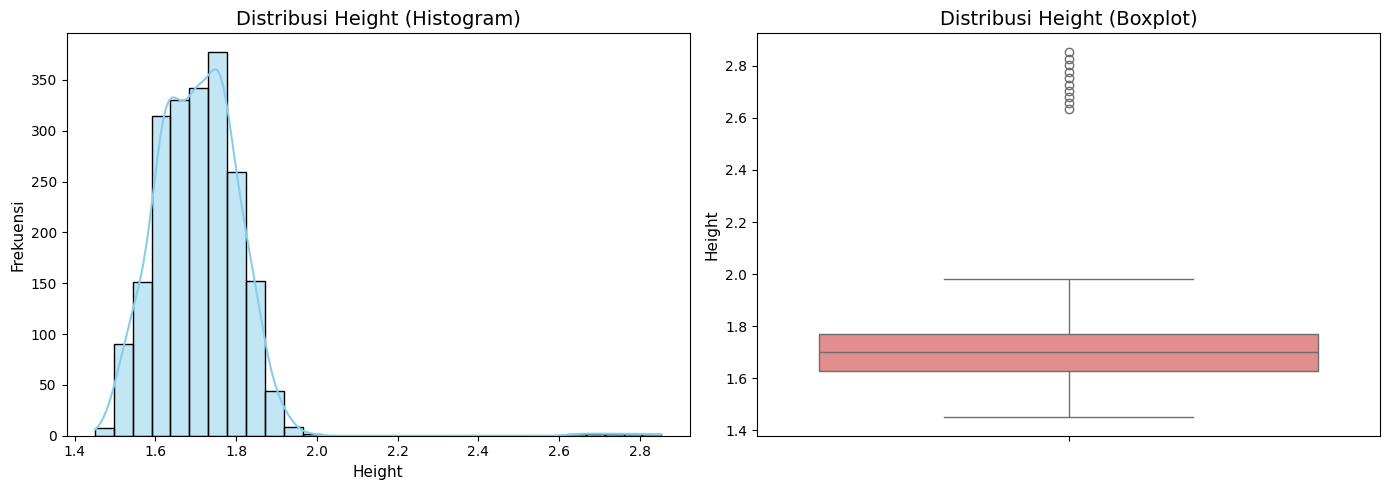

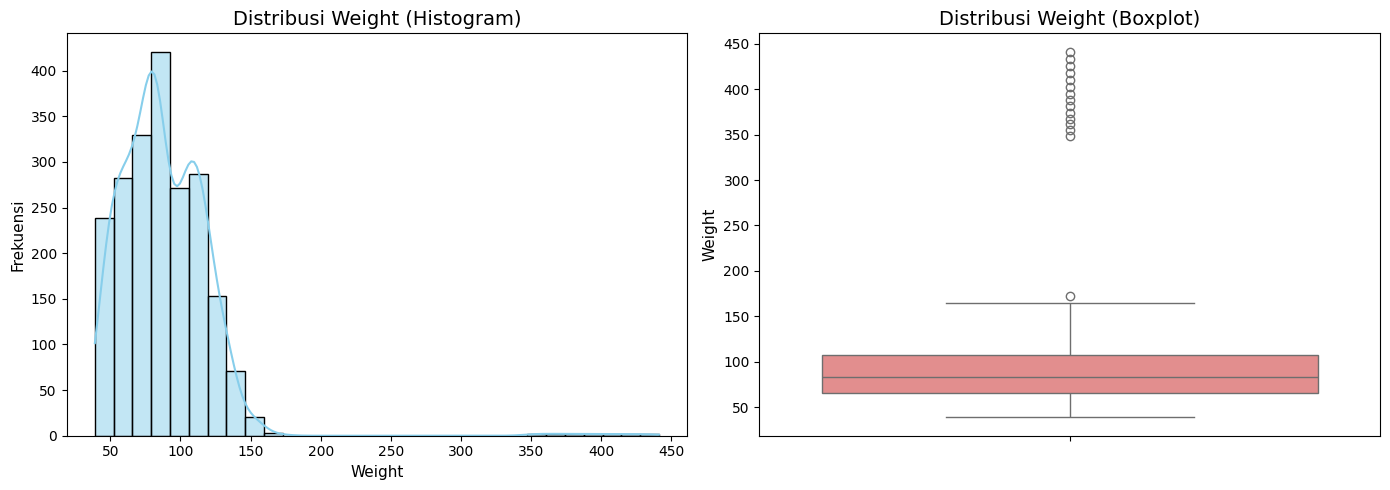

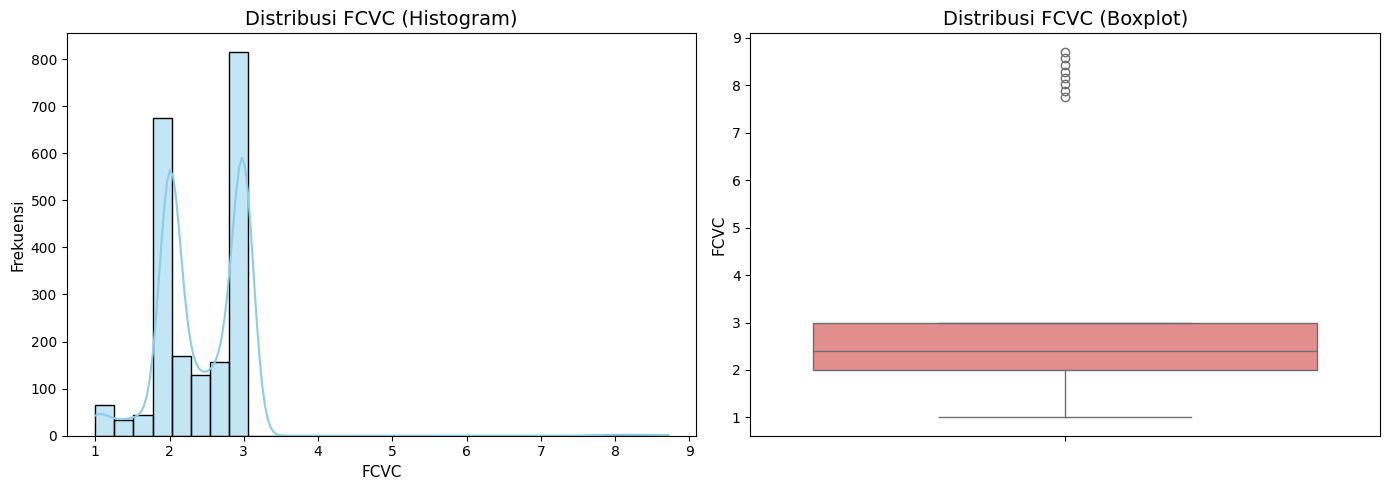

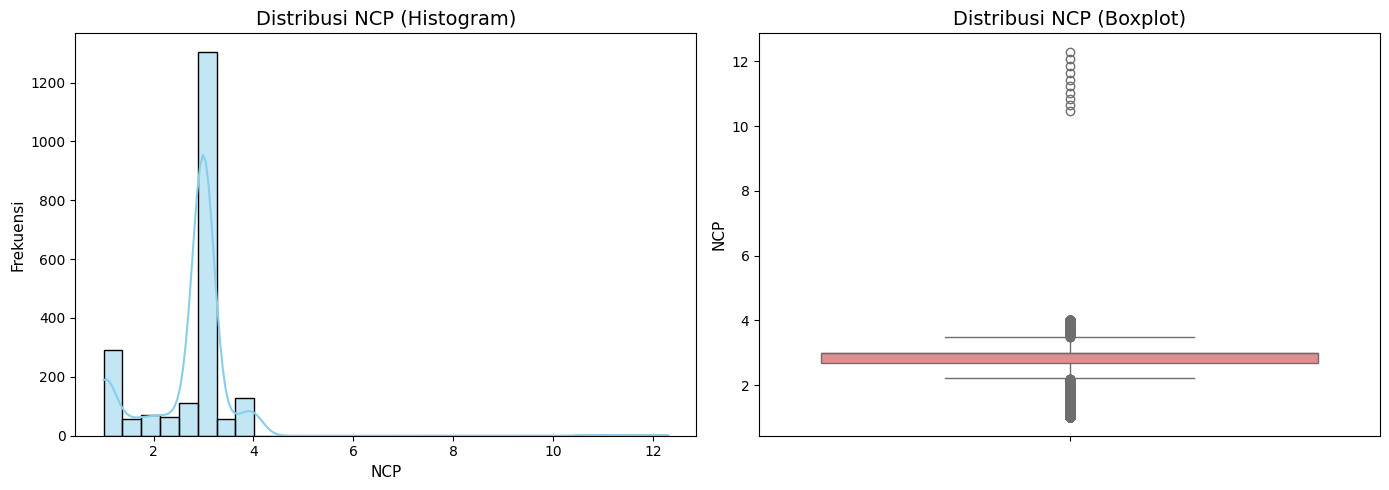

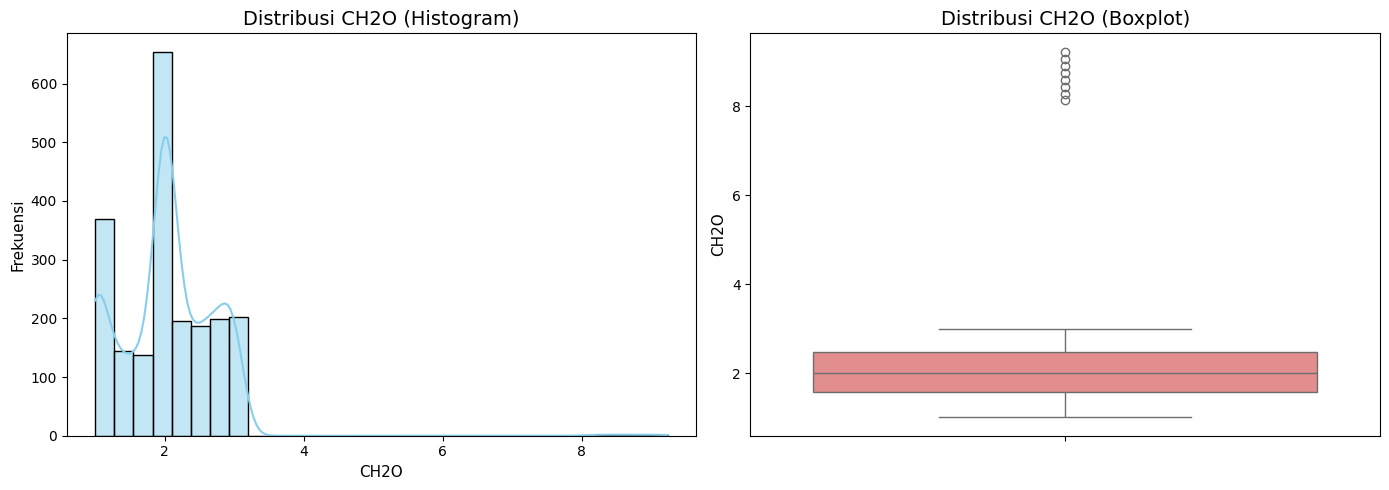

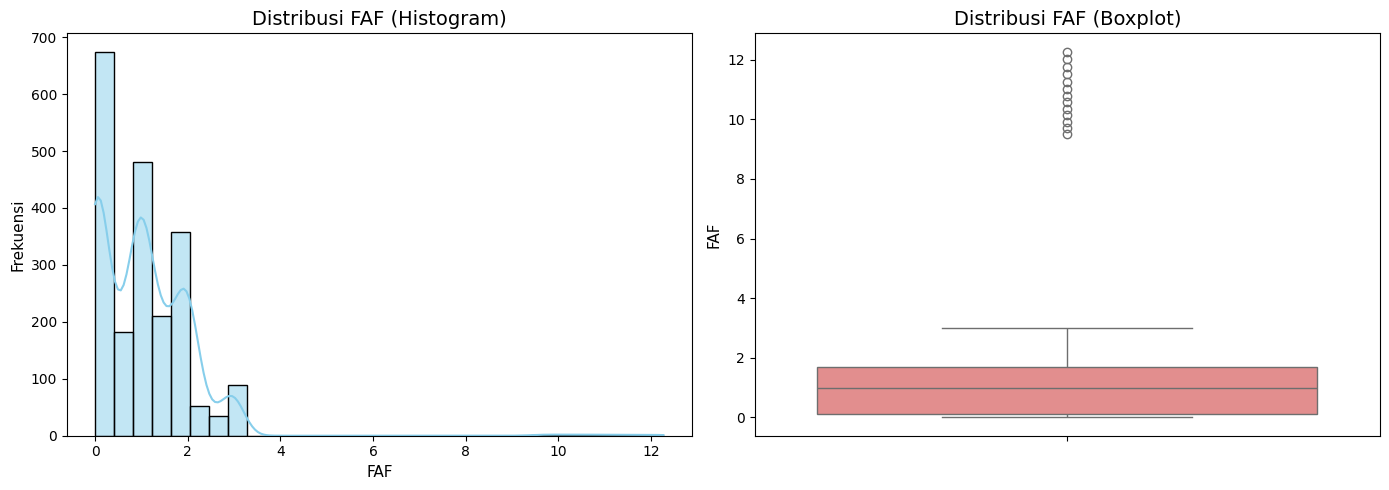

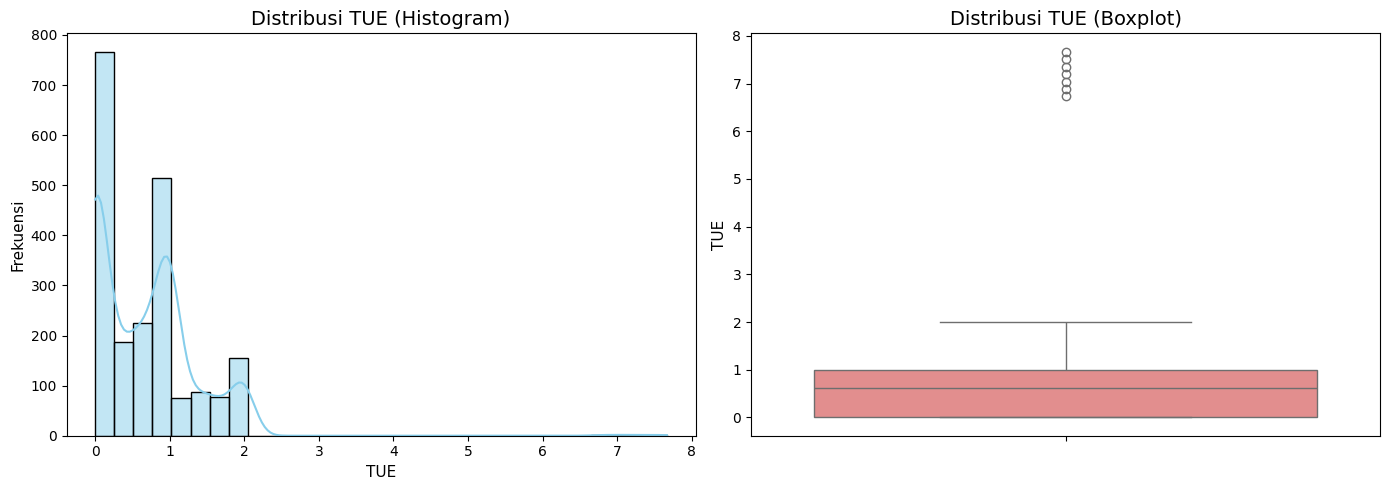

In [13]:
#Visualisasi distribusi fitur numerik
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
print(f"Kolom Numerik: {numerical_cols}")

for col in numerical_cols:
    plt.figure(figsize=(14, 5))

    #Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribusi {col} (Histogram)', fontsize=14)
    plt.xlabel(col, fontsize=11)
    plt.ylabel('Frekuensi', fontsize=11)

    #Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col], color='lightcoral')
    plt.title(f'Distribusi {col} (Boxplot)', fontsize=14)
    plt.ylabel(col, fontsize=11)

    plt.tight_layout()
    plt.show()


Kolom Kategorikal (Fitur): ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS']


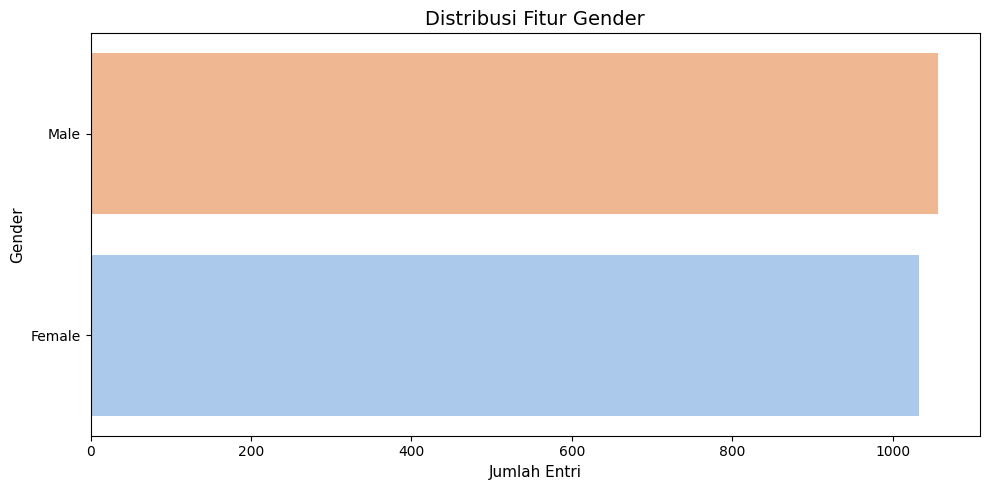


Frekuensi setiap kategori di kolom Gender:
Gender
Male      50.023685
Female    48.934154
NaN        1.042160
Name: proportion, dtype: float64


Gender
Male      1056
Female    1033
NaN         22
Name: count, dtype: int64
--------------------------------------------------


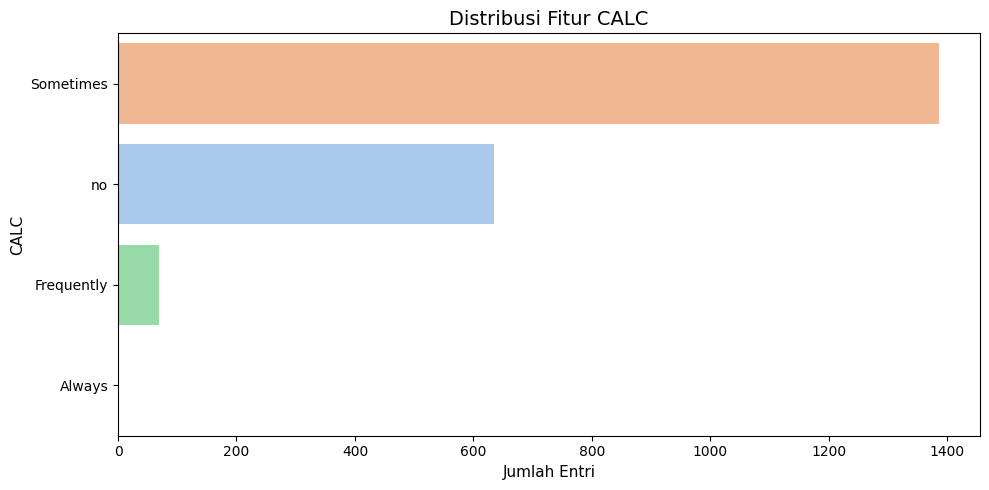


Frekuensi setiap kategori di kolom CALC:
CALC
Sometimes     65.656087
no            30.033160
Frequently     3.315964
NaN            0.947418
Always         0.047371
Name: proportion, dtype: float64


CALC
Sometimes     1386
no             634
Frequently      70
NaN             20
Always           1
Name: count, dtype: int64
--------------------------------------------------


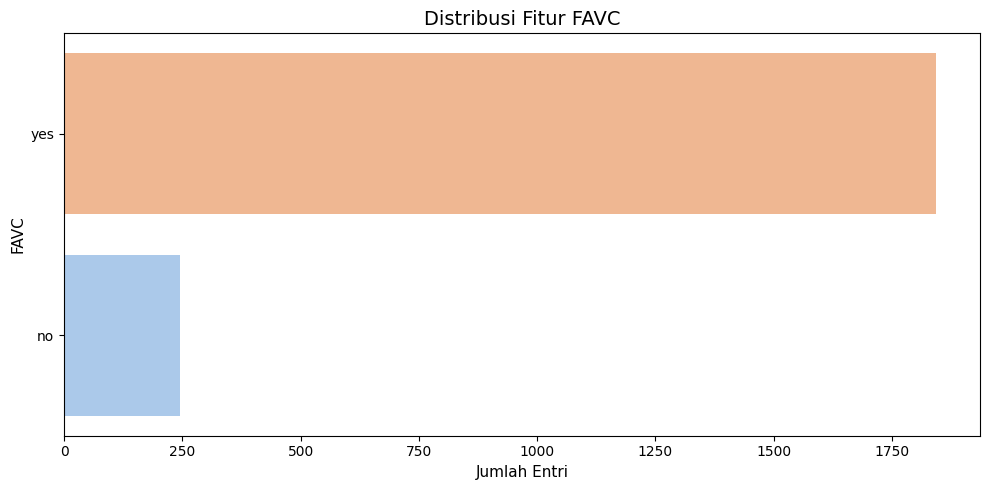


Frekuensi setiap kategori di kolom FAVC:
FAVC
yes    87.351966
no     11.605874
NaN     1.042160
Name: proportion, dtype: float64


FAVC
yes    1844
no      245
NaN      22
Name: count, dtype: int64
--------------------------------------------------


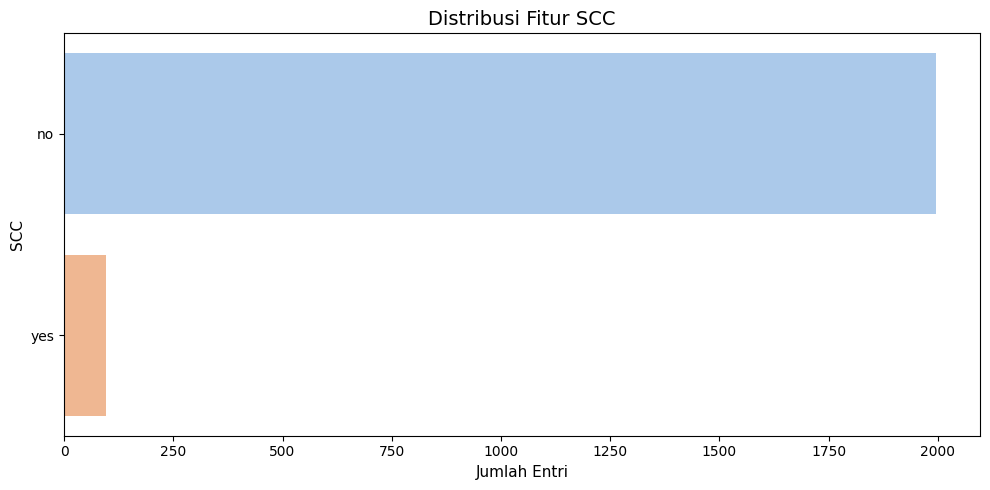


Frekuensi setiap kategori di kolom SCC:
SCC
no     94.599716
yes     4.547608
NaN     0.852676
Name: proportion, dtype: float64


SCC
no     1997
yes      96
NaN      18
Name: count, dtype: int64
--------------------------------------------------


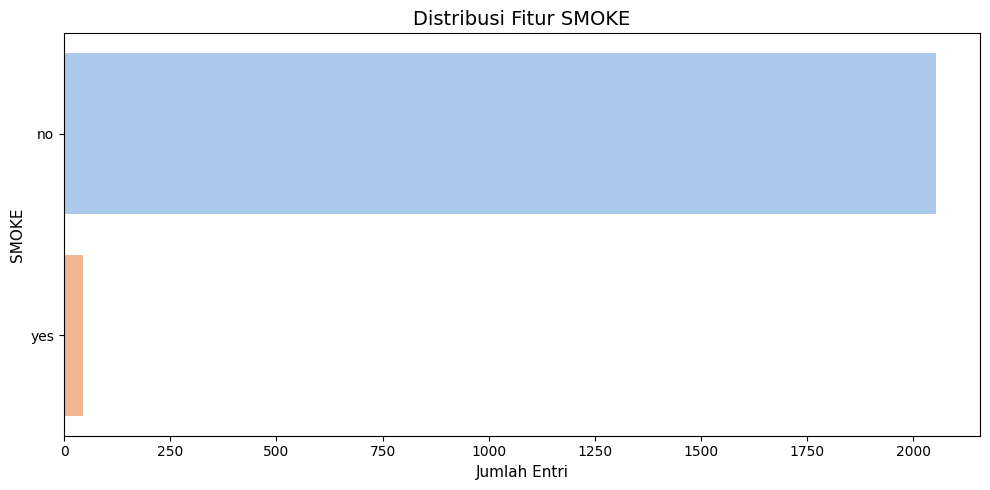


Frekuensi setiap kategori di kolom SMOKE:
SMOKE
no     97.299858
yes     2.084320
NaN     0.615822
Name: proportion, dtype: float64


SMOKE
no     2054
yes      44
NaN      13
Name: count, dtype: int64
--------------------------------------------------


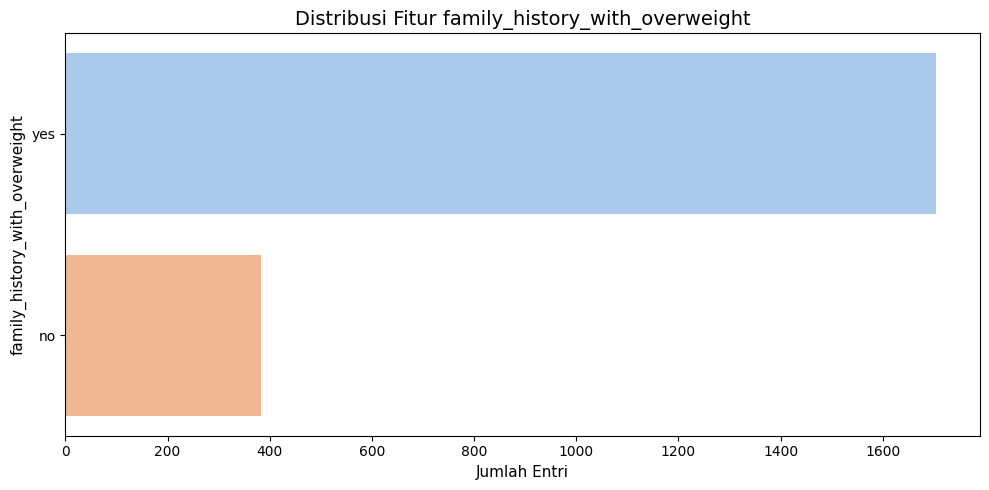


Frekuensi setiap kategori di kolom family_history_with_overweight:
family_history_with_overweight
yes    80.767409
no     18.143060
NaN     1.089531
Name: proportion, dtype: float64


family_history_with_overweight
yes    1705
no      383
NaN      23
Name: count, dtype: int64
--------------------------------------------------


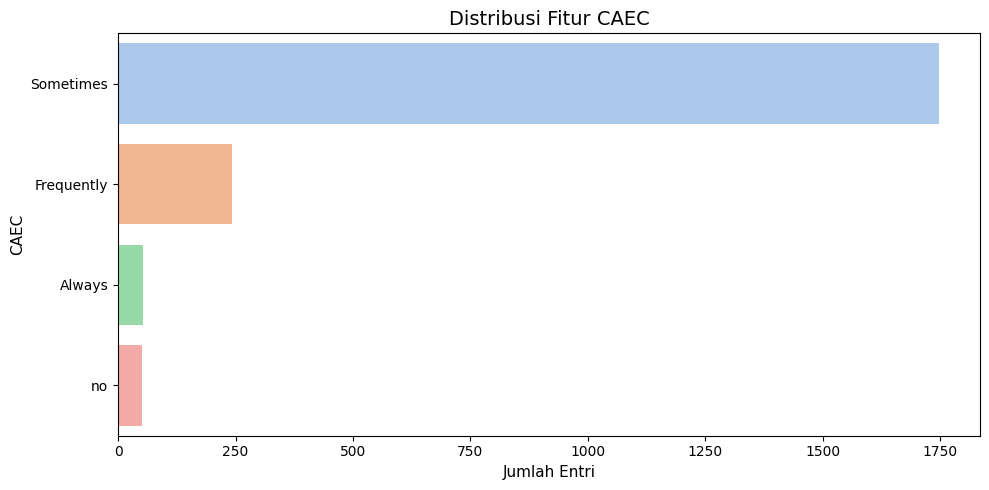


Frekuensi setiap kategori di kolom CAEC:
CAEC
Sometimes     82.756987
Frequently    11.463761
Always         2.510658
no             2.415917
NaN            0.852676
Name: proportion, dtype: float64


CAEC
Sometimes     1747
Frequently     242
Always          53
no              51
NaN             18
Name: count, dtype: int64
--------------------------------------------------


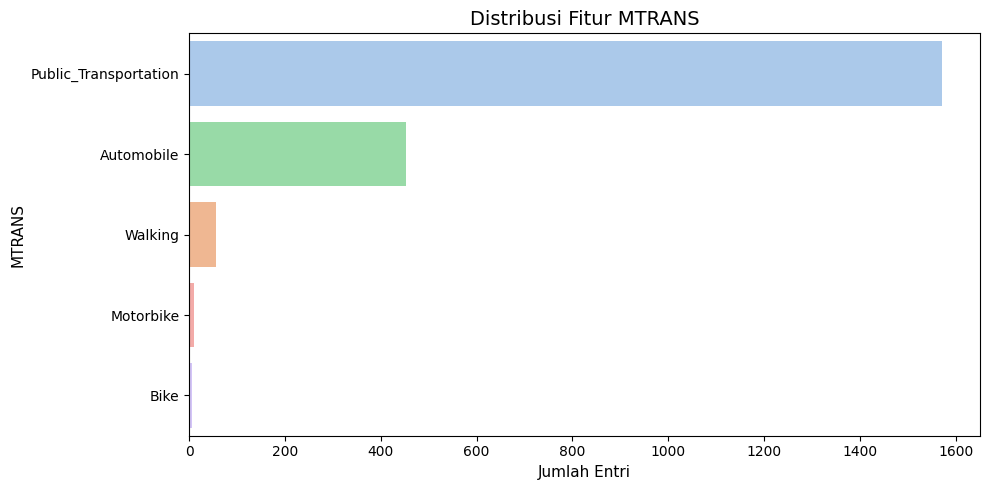


Frekuensi setiap kategori di kolom MTRANS:
MTRANS
Public_Transportation    74.467077
Automobile               21.459024
Walking                   2.652771
NaN                       0.568451
Motorbike                 0.521080
Bike                      0.331596
Name: proportion, dtype: float64


MTRANS
Public_Transportation    1572
Automobile                453
Walking                    56
NaN                        12
Motorbike                  11
Bike                        7
Name: count, dtype: int64
--------------------------------------------------


In [14]:
#Visualisasi distribusi fitur kategorikal
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('NObeyesdad')
print(f"\nKolom Kategorikal (Fitur): {categorical_cols}")

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='pastel', hue=col, legend=False)
    plt.title(f'Distribusi Fitur {col}', fontsize=14)
    plt.xlabel('Jumlah Entri', fontsize=11)
    plt.ylabel(col, fontsize=11)
    plt.tight_layout()
    plt.show()

    print(f"\nFrekuensi setiap kategori di kolom {col}:")
    print(df[col].value_counts(normalize=True, dropna=False) * 100)
    print("\n")
    print(df[col].value_counts(dropna=False))
    print("-" * 50)

In [15]:
#Mengganti outlier dengan batas atas/bawah IQR
def cap_outliers_iqr(dataframe, column_name):

    Q1 = dataframe[column_name].quantile(0.25)
    Q3 = dataframe[column_name].quantile(0.75)
    IQR_value = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR_value
    upper_bound = Q3 + 1.5 * IQR_value

    df_capped = dataframe.copy()
    df_capped[column_name] = np.where(df_capped[column_name] < lower_bound, lower_bound, df_capped[column_name])
    df_capped[column_name] = np.where(df_capped[column_name] > upper_bound, upper_bound, df_capped[column_name])

    print(f"Kolom '{column_name}':")
    print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR_value:.2f}")
    print(f"  Batas Bawah (IQR): {lower_bound:.2f}")
    print(f"  Batas Atas (IQR): {upper_bound:.2f}")
    print(f"  Nilai min setelah capping: {df_capped[column_name].min():.2f}")
    print(f"  Nilai max setelah capping: {df_capped[column_name].max():.2f}")

    return df_capped[column_name]

df_cleaned = df.copy()

print("Proses Capping Outlier Menggunakan IQR")
for col in numerical_cols:
    if df_cleaned[col].isnull().all():
        continue
    df_cleaned[col] = cap_outliers_iqr(df_cleaned, col)
    print("-" * 30)

print("\nStatistik deskriptif SETELAH capping outlier:")
display(df_cleaned[numerical_cols].describe())

Proses Capping Outlier Menggunakan IQR
Kolom 'Age':
  Q1: 19.96, Q3: 26.00, IQR: 6.04
  Batas Bawah (IQR): 10.89
  Batas Atas (IQR): 35.07
  Nilai min setelah capping: 14.00
  Nilai max setelah capping: 35.07
------------------------------
Kolom 'Height':
  Q1: 1.63, Q3: 1.77, IQR: 0.14
  Batas Bawah (IQR): 1.42
  Batas Atas (IQR): 1.98
  Nilai min setelah capping: 1.45
  Nilai max setelah capping: 1.98
------------------------------
Kolom 'Weight':
  Q1: 66.00, Q3: 108.06, IQR: 42.06
  Batas Bawah (IQR): 2.92
  Batas Atas (IQR): 171.14
  Nilai min setelah capping: 39.00
  Nilai max setelah capping: 171.14
------------------------------
Kolom 'FCVC':
  Q1: 2.00, Q3: 3.00, IQR: 1.00
  Batas Bawah (IQR): 0.50
  Batas Atas (IQR): 4.50
  Nilai min setelah capping: 1.00
  Nilai max setelah capping: 4.50
------------------------------
Kolom 'NCP':
  Q1: 2.68, Q3: 3.00, IQR: 0.32
  Batas Bawah (IQR): 2.19
  Batas Atas (IQR): 3.49
  Nilai min setelah capping: 2.19
  Nilai max setelah capping: 

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2089.000000,2089.000000,2092.000000,2093.000000,2089.000000,2096.000000,2092.000000,2096.000000
mean,23.957723,1.702980,87.124304,2.429286,2.846821,2.012154,1.031070,0.664444
std,5.328951,0.095133,26.936839,0.548602,0.384837,0.622792,0.881073,0.618717
min,14.000000,1.450000,39.000000,1.000000,2.188528,1.000000,0.000000,0.000000
25%,19.955257,1.630000,66.000000,2.000000,2.675411,1.569911,0.129009,0.000000
50%,22.814657,1.701284,83.000000,2.397284,3.000000,2.000000,1.000000,0.625360
75%,26.000000,1.770000,108.055736,3.000000,3.000000,2.482454,1.683612,1.000000
max,35.067115,1.980000,171.139341,4.500000,3.486884,3.851267,4.015516,2.500000



Distribusi Fitur Numerik SETELAH Capping Outlier


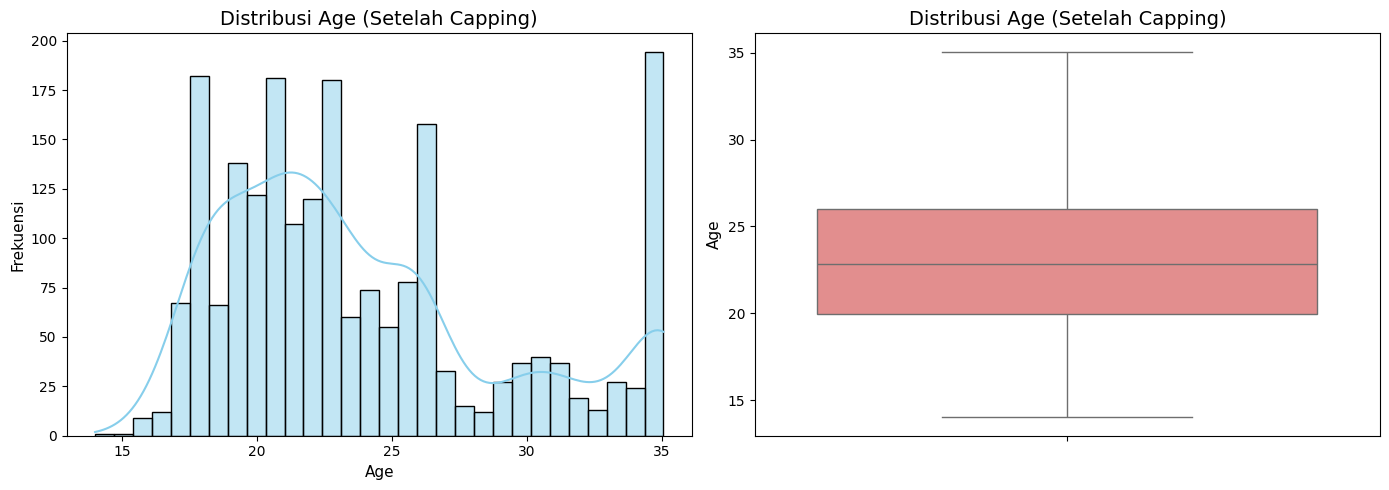

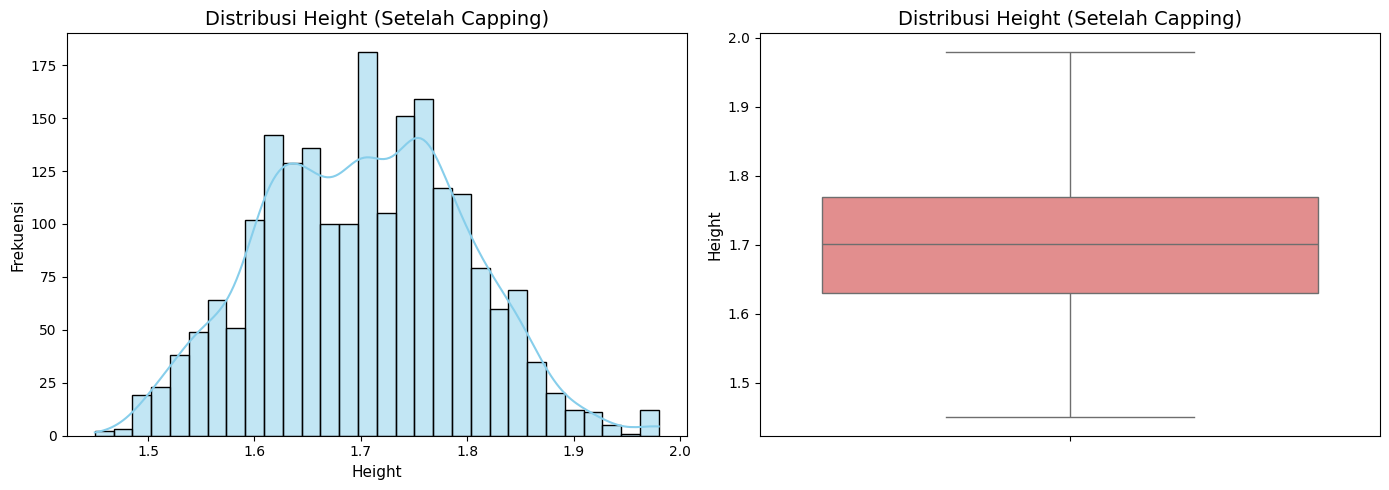

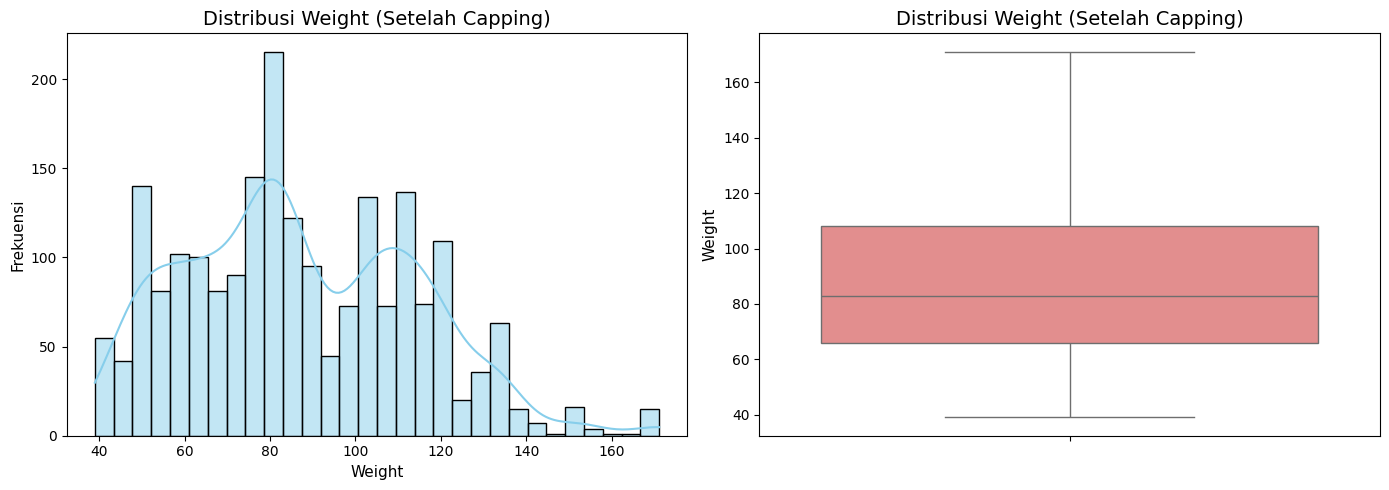

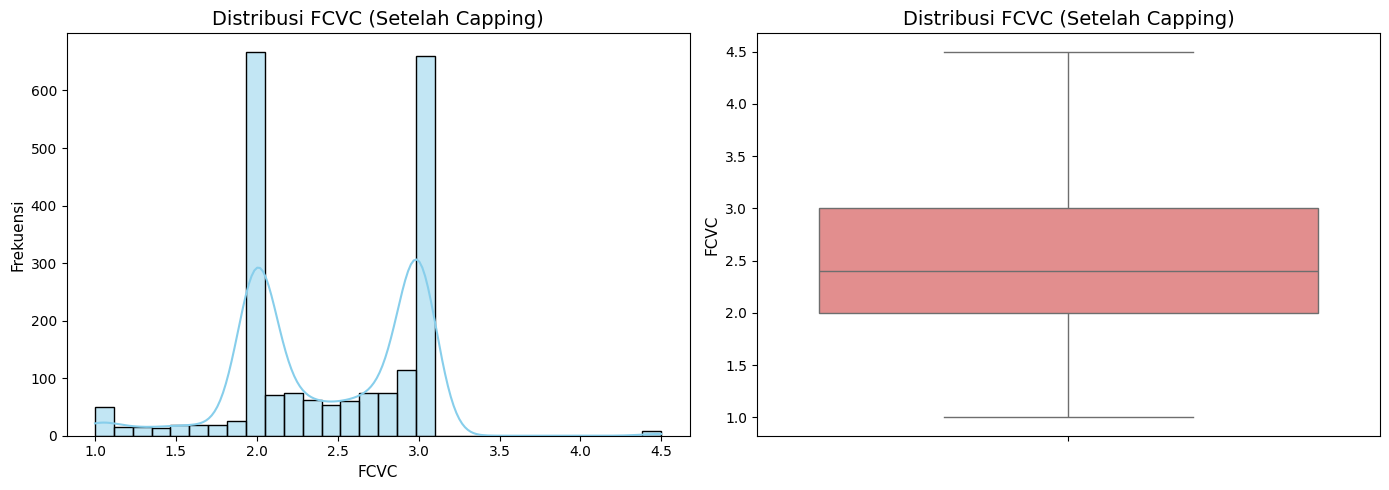

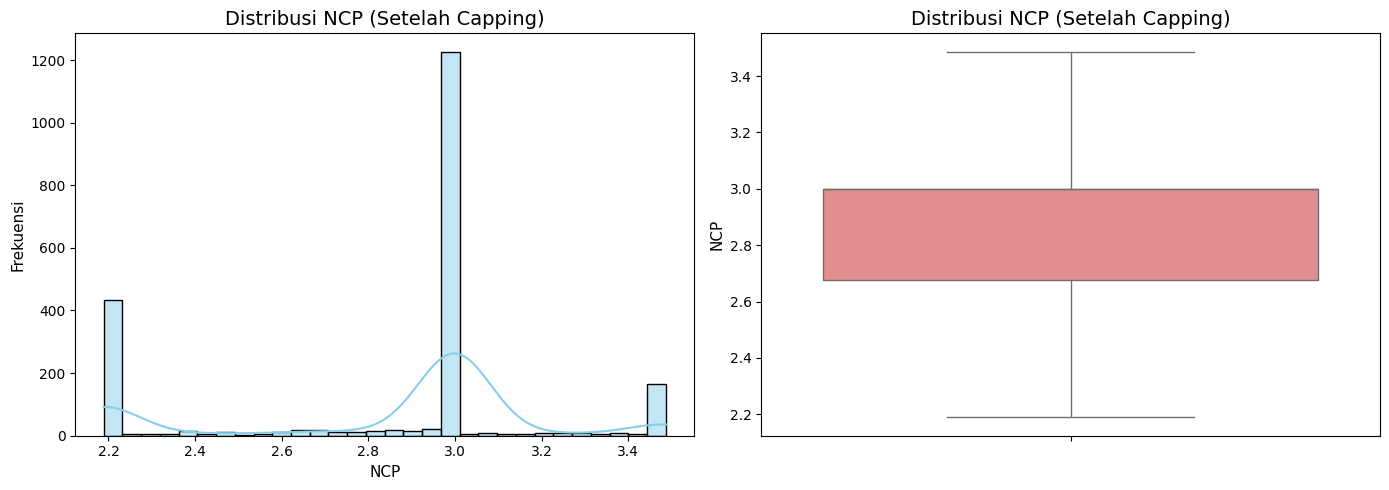

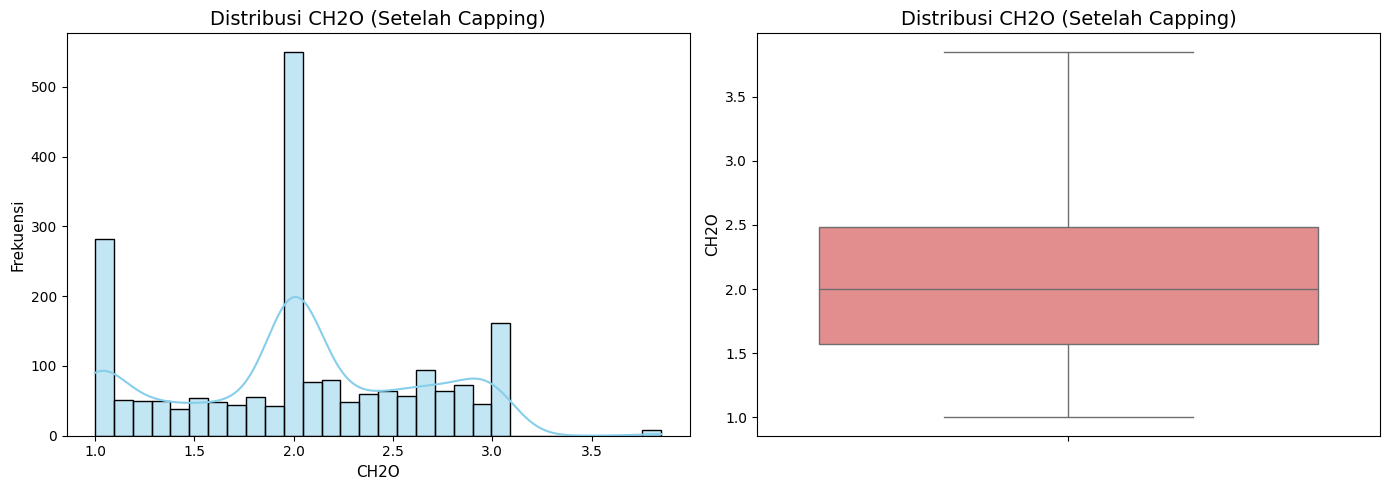

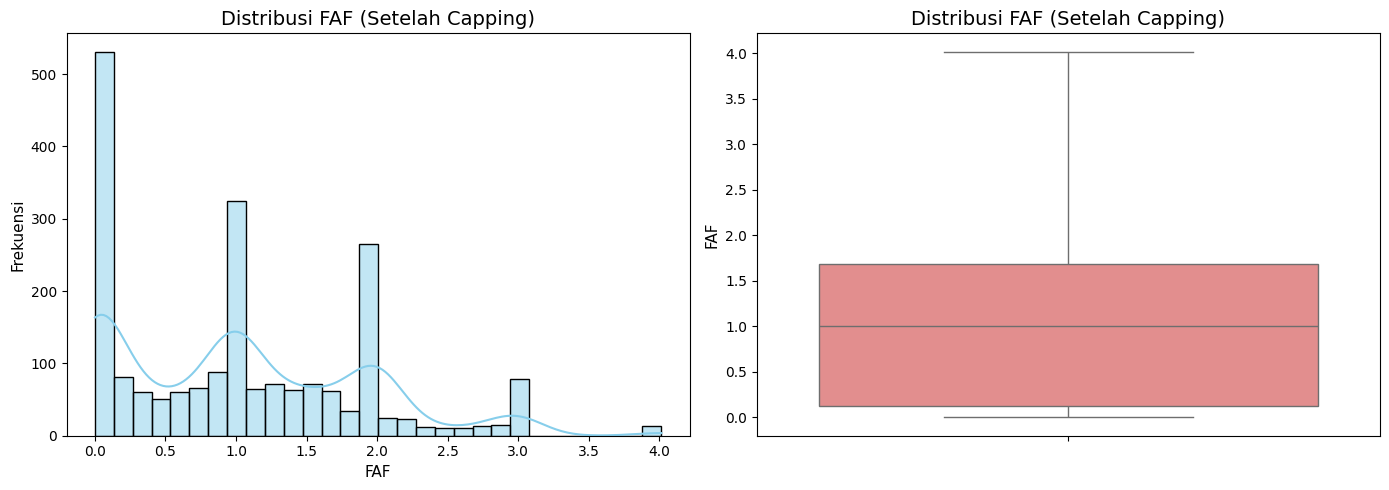

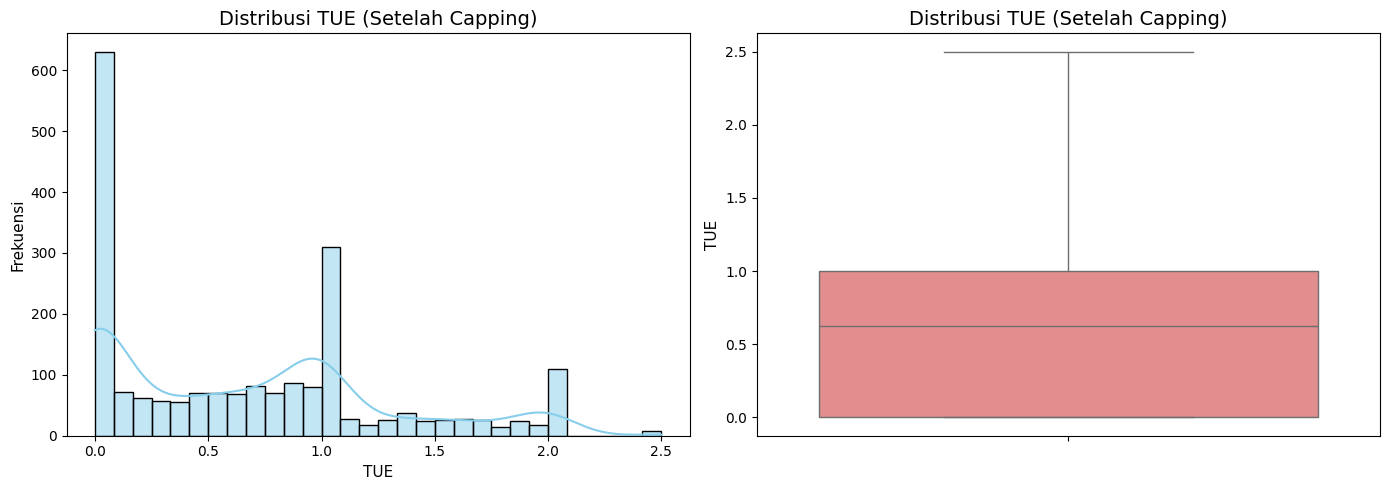

In [16]:
#Visualisasi distribusi fitur numerik setelah capping outlier
print("\nDistribusi Fitur Numerik SETELAH Capping Outlier")
for col in numerical_cols:
    plt.figure(figsize=(14, 5))

    #Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_cleaned[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribusi {col} (Setelah Capping)', fontsize=14)
    plt.xlabel(col, fontsize=11)
    plt.ylabel('Frekuensi', fontsize=11)

    #Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_cleaned[col], color='lightcoral')
    plt.title(f'Distribusi {col} (Setelah Capping)', fontsize=14)
    plt.ylabel(col, fontsize=11)

    plt.tight_layout()
    plt.show()

In [17]:
#Penanganan Missing Value
#Kolom numerik yang akan diimputasi
numerical_cols_to_impute = [col for col in numerical_cols if df_cleaned[col].isnull().any()]
print(f"Kolom numerik dengan NaN yang akan diimputasi: {numerical_cols_to_impute}")

#Kolom kategorikal yang akan diimputasi
categorical_cols_to_impute = [col for col in categorical_cols if df_cleaned[col].isnull().any()]
print(f"Kolom kategorikal dengan NaN yang akan diimputasi: {categorical_cols_to_impute}")

Kolom numerik dengan NaN yang akan diimputasi: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Kolom kategorikal dengan NaN yang akan diimputasi: ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS']


In [18]:
#Imputasi fitur numerik dengan median
for col in numerical_cols_to_impute:
    median_val = df_cleaned[col].median()
    df_cleaned[col].fillna(median_val, inplace=True)
    print(f"  Kolom '{col}': NaN diisi dengan median ({median_val:.2f})")

#Imputasi fitur kategorikal dengan modus
for col in categorical_cols_to_impute:
    mode_val = df_cleaned[col].mode()[0]
    df_cleaned[col].fillna(mode_val, inplace=True)
    print(f"  Kolom '{col}': NaN diisi dengan modus ('{mode_val}')")

  Kolom 'Age': NaN diisi dengan median (22.81)
  Kolom 'Height': NaN diisi dengan median (1.70)
  Kolom 'Weight': NaN diisi dengan median (83.00)
  Kolom 'FCVC': NaN diisi dengan median (2.40)
  Kolom 'NCP': NaN diisi dengan median (3.00)
  Kolom 'CH2O': NaN diisi dengan median (2.00)
  Kolom 'FAF': NaN diisi dengan median (1.00)
  Kolom 'TUE': NaN diisi dengan median (0.63)
  Kolom 'Gender': NaN diisi dengan modus ('Male')
  Kolom 'CALC': NaN diisi dengan modus ('Sometimes')
  Kolom 'FAVC': NaN diisi dengan modus ('yes')
  Kolom 'SCC': NaN diisi dengan modus ('no')
  Kolom 'SMOKE': NaN diisi dengan modus ('no')
  Kolom 'family_history_with_overweight': NaN diisi dengan modus ('yes')
  Kolom 'CAEC': NaN diisi dengan modus ('Sometimes')
  Kolom 'MTRANS': NaN diisi dengan modus ('Public_Transportation')


<ipython-input-18-8b601c1c47e6>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(median_val, inplace=True)
<ipython-input-18-8b601c1c47e6>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [19]:
#Verifikasi Missing Value
print("\nJumlah missing values setelah imputasi:")
print(df_cleaned.isnull().sum())

print("\nInformasi umum dataset setelah imputasi:")
df_cleaned.info()


Jumlah missing values setelah imputasi:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Informasi umum dataset setelah imputasi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1

In [20]:
#Mengubah kolom kategorikal ke numerik dengan Label Encoding
df_encoded_le = df_cleaned.copy()
le = LabelEncoder()

cols_for_standard_le = ['Gender', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'MTRANS']
for col in cols_for_standard_le:
    df_encoded_le[col] = le.fit_transform(df_encoded_le[col])
    print(f"Kolom '{col}' di-encode. Kelas: {le.classes_} -> {np.unique(df_encoded_le[col])}")

#Pemetaan manual untuk Fitur Ordinal (CALC, CAEC)
calc_mapping = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
df_encoded_le['CALC'] = df_encoded_le['CALC'].map(calc_mapping)
print(f"\nKolom 'CALC' di-encode dengan pemetaan manual.")
print(f"  Nilai unik setelah encode: {df_encoded_le['CALC'].unique()}")

caec_mapping = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
df_encoded_le['CAEC'] = df_encoded_le['CAEC'].map(caec_mapping)
print(f"Kolom 'CAEC' di-encode dengan pemetaan manual.")
print(f"  Nilai unik setelah encode: {df_encoded_le['CAEC'].unique()}")

df_encoded_le['NObeyesdad_encoded'] = le.fit_transform(df_encoded_le['NObeyesdad'])
target_mapping_le = dict(zip(le.classes_, le.transform(le.classes_)))
print(f"\nKolom target 'NObeyesdad' di-encode menjadi 'NObeyesdad_encoded'.")
print(f"  Pemetaan Target: {target_mapping_le}")

df_encoded_le.drop(columns=['NObeyesdad'], inplace=True)

print("\nDataFrame setelah Label Encoding untuk semua fitur kategorikal:")
display(df_encoded_le.head())
df_encoded_le.info()

Kolom 'Gender' di-encode. Kelas: ['Female' 'Male'] -> [0 1]
Kolom 'FAVC' di-encode. Kelas: ['no' 'yes'] -> [0 1]
Kolom 'SCC' di-encode. Kelas: ['no' 'yes'] -> [0 1]
Kolom 'SMOKE' di-encode. Kelas: ['no' 'yes'] -> [0 1]
Kolom 'family_history_with_overweight' di-encode. Kelas: ['no' 'yes'] -> [0 1]
Kolom 'MTRANS' di-encode. Kelas: ['Automobile' 'Bike' 'Motorbike' 'Public_Transportation' 'Walking'] -> [0 1 2 3 4]

Kolom 'CALC' di-encode dengan pemetaan manual.
  Nilai unik setelah encode: [0 1 2 3]
Kolom 'CAEC' di-encode dengan pemetaan manual.
  Nilai unik setelah encode: [1 2 3 0]

Kolom target 'NObeyesdad' di-encode menjadi 'NObeyesdad_encoded'.
  Pemetaan Target: {'Insufficient_Weight': np.int64(0), 'Normal_Weight': np.int64(1), 'Obesity_Type_I': np.int64(2), 'Obesity_Type_II': np.int64(3), 'Obesity_Type_III': np.int64(4), 'Overweight_Level_I': np.int64(5), 'Overweight_Level_II': np.int64(6)}

DataFrame setelah Label Encoding untuk semua fitur kategorikal:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad_encoded
0,21.0,0,1.62,64.0,0,0,2.0,3.000000,0,0,2.0,1,0.0,1.0,1,3,1
1,21.0,0,1.52,56.0,1,0,3.0,3.000000,1,1,3.0,1,3.0,0.0,1,3,1
2,23.0,1,1.80,77.0,2,0,2.0,3.000000,0,0,2.0,1,2.0,1.0,1,3,1
3,27.0,1,1.80,87.0,2,0,3.0,3.000000,0,0,2.0,0,2.0,0.0,1,4,5
4,22.0,1,1.78,89.8,1,0,2.0,2.188528,0,0,2.0,0,0.0,0.0,1,3,6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   int64  
 12  FAF                             21

In [21]:
#Cek duplikat
duplicate_rows = df_encoded_le.duplicated()
duplicate_count = df_encoded_le.duplicated().sum()

print("Jumlah duplikat:", duplicate_count)
print("Baris duplikat: ")
df_encoded_le[df_encoded_le.duplicated(keep=False)]

Jumlah duplikat: 21
Baris duplikat: 


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad_encoded
97,21.0,0,1.52,42.0,1,0,3.0,2.188528,0,0,1.0,0,0.000000,0.0,2,3,0
98,21.0,0,1.52,42.0,1,0,3.0,2.188528,0,0,1.0,0,0.000000,0.0,2,3,0
145,21.0,1,1.62,70.0,1,1,2.0,2.188528,0,0,3.0,0,1.000000,0.0,0,3,5
174,21.0,1,1.62,70.0,1,1,2.0,2.188528,0,0,3.0,0,1.000000,0.0,0,3,5
179,21.0,1,1.62,70.0,1,1,2.0,2.188528,0,0,3.0,0,1.000000,0.0,0,3,5
184,21.0,1,1.62,70.0,1,1,2.0,2.188528,0,0,3.0,0,1.000000,0.0,0,3,5
282,18.0,0,1.62,55.0,0,1,2.0,3.000000,0,0,1.0,1,1.000000,1.0,2,3,1
295,16.0,0,1.66,58.0,0,0,2.0,2.188528,0,0,1.0,0,0.000000,1.0,1,4,1
309,16.0,0,1.66,58.0,0,0,2.0,2.188528,0,0,1.0,0,0.000000,1.0,1,4,1
443,18.0,1,1.72,53.0,1,1,2.0,3.000000,0,0,2.0,1,0.000000,2.0,1,3,0


In [22]:
#Handling duplikat (dihapus)
df_encoded_le = df_encoded_le.drop_duplicates()

duplicate_count_after = df_encoded_le.duplicated().sum()
print("Jumlah duplikat:", duplicate_count_after)

Jumlah duplikat: 0


In [23]:
# Normalisasi Data (Min-Max Scaling)
X = df_encoded_le.drop('NObeyesdad_encoded', axis=1)
y = df_encoded_le['NObeyesdad_encoded']

print("Dimensi Fitur (X):", X.shape)
print("Dimensi Target (y):", y.shape)

scaler = MinMaxScaler()

X_scaled_array = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled_array, columns=X.columns)

print("\nBeberapa baris pertama dari fitur setelah Min-Max Scaling:")
display(X_scaled.head())

print("\nStatistik deskriptif dari fitur setelah Min-Max Scaling:")
display(X_scaled.describe())

Dimensi Fitur (X): (2090, 16)
Dimensi Target (y): (2090,)

Beberapa baris pertama dari fitur setelah Min-Max Scaling:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
0,0.332271,0.0,0.320755,0.189194,0.000000,0.0,0.285714,0.625,0.0,0.0,0.350721,1.0,0.000000,0.4,0.333333,0.75
1,0.332271,0.0,0.132075,0.128652,0.333333,0.0,0.571429,0.625,1.0,1.0,0.701443,1.0,0.747102,0.0,0.333333,0.75
2,0.427206,1.0,0.660377,0.287575,0.666667,0.0,0.285714,0.625,0.0,0.0,0.350721,1.0,0.498068,0.4,0.333333,0.75
3,0.617075,1.0,0.660377,0.363253,0.666667,0.0,0.571429,0.625,0.0,0.0,0.350721,0.0,0.498068,0.0,0.333333,1.00
4,0.379739,1.0,0.622642,0.384443,0.333333,0.0,0.285714,0.000,0.0,0.0,0.350721,0.0,0.000000,0.0,0.333333,0.75



Statistik deskriptif dari fitur setelah Min-Max Scaling:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
count,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000
mean,0.473733,0.508134,0.478896,0.365657,0.244179,0.883732,0.408974,0.512460,0.045933,0.021053,0.353654,0.825359,0.256896,0.267570,0.382137,0.591388
std,0.252337,0.500053,0.178460,0.203063,0.171888,0.320623,0.156304,0.292737,0.209390,0.143594,0.216053,0.379751,0.218631,0.246296,0.153189,0.315200
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.284004,0.000000,0.342850,0.204330,0.000000,1.000000,0.285714,0.414756,0.000000,0.000000,0.207440,1.000000,0.032538,0.000000,0.333333,0.750000
50%,0.418408,1.000000,0.474121,0.332982,0.333333,1.000000,0.399224,0.625000,0.000000,0.000000,0.350721,1.000000,0.249034,0.250146,0.333333,0.750000
75%,0.569608,1.000000,0.603774,0.522771,0.333333,1.000000,0.571429,0.625000,0.000000,0.000000,0.512552,1.000000,0.419211,0.400000,0.333333,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
#Pembagian Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("Dimensi X_train:", X_train.shape)
print("Dimensi X_test:", X_test.shape)
print("Dimensi y_train:", y_train.shape)
print("Dimensi y_test:", y_test.shape)

print("\nDistribusi kelas target di y_train:")
print(y_train.value_counts(normalize=True) * 100)

print("\nDistribusi kelas target di y_test:")
print(y_test.value_counts(normalize=True) * 100)

Dimensi X_train: (1672, 16)
Dimensi X_test: (418, 16)
Dimensi y_train: (1672,)
Dimensi y_test: (418,)

Distribusi kelas target di y_train:
NObeyesdad_encoded
2    16.806220
4    15.490431
3    14.234450
6    13.875598
1    13.576555
5    13.217703
0    12.799043
Name: proportion, dtype: float64

Distribusi kelas target di y_test:
NObeyesdad_encoded
2    16.746411
4    15.550239
3    14.114833
6    13.875598
1    13.636364
5    13.157895
0    12.918660
Name: proportion, dtype: float64


Melatih model Decision Tree...
Pelatihan model Decision Tree selesai.

Prediksi pada data test:
[2 3 4 5 2 0 2 4 4 1 6 6 5 6 3 2 2 1 2 1]
Nilai aktual pada data test:
[3 3 4 5 6 0 2 4 4 1 6 6 6 6 3 2 2 1 2 1]
Akurasi Decision Tree: 0.9139

Laporan Klasifikasi Decision Tree:
                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.96      0.96        54
      Normal_Weight       0.81      0.89      0.85        57
     Obesity_Type_I       0.90      0.91      0.91        70
    Obesity_Type_II       0.96      0.93      0.95        59
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.88      0.78      0.83        55
Overweight_Level_II       0.88      0.91      0.90        58

           accuracy                           0.91       418
          macro avg       0.91      0.91      0.91       418
       weighted avg       0.92      0.91      0.91       418


Confusion Matrix Decision Tree:


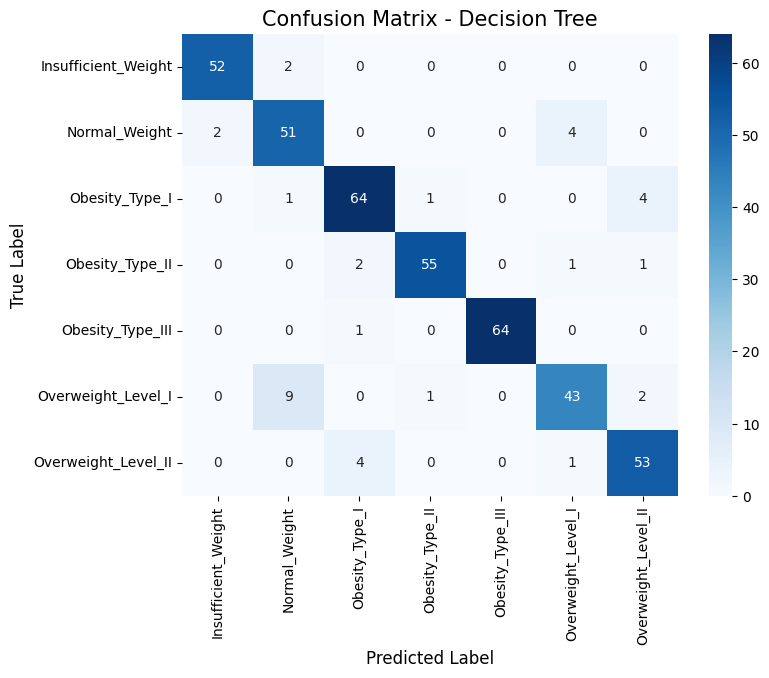


Performa Decision Tree (untuk tabel perbandingan nanti): {'Akurasi': 0.9138755980861244, 'F1_Macro': 0.9123594953079983, 'F1_Weighted': 0.9139305342820103, 'Precision_Weighted': 0.9154782600701884, 'Recall_Weighted': 0.9138755980861244}


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

dt_model = DecisionTreeClassifier(random_state=42)

print("Melatih model Decision Tree...")
dt_model.fit(X_train, y_train)
print("Pelatihan model Decision Tree selesai.")

y_pred_dt = dt_model.predict(X_test)

print("\nPrediksi pada data test:")
print(y_pred_dt[:20])
print("Nilai aktual pada data test:")
print(y_test.values[:20])

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Akurasi Decision Tree: {accuracy_dt:.4f}")

print("\nLaporan Klasifikasi Decision Tree:")
class_names_dt = [key for key, val in sorted(target_mapping_le.items(), key=lambda item: item[1])]
print(classification_report(y_test, y_pred_dt, target_names=class_names_dt, zero_division=0))

print("\nConfusion Matrix Decision Tree:")
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=class_names_dt, yticklabels=class_names_dt)
plt.title('Confusion Matrix - Decision Tree', fontsize=15)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

model_performance = {}
model_performance['Decision Tree'] = {
    'Akurasi': accuracy_dt,
    'F1_Macro': f1_score(y_test, y_pred_dt, average='macro', zero_division=0),
    'F1_Weighted': f1_score(y_test, y_pred_dt, average='weighted', zero_division=0),
    'Precision_Weighted': precision_score(y_test, y_pred_dt, average='weighted', zero_division=0),
    'Recall_Weighted': recall_score(y_test, y_pred_dt, average='weighted', zero_division=0)
}
print(f"\nPerforma Decision Tree (untuk tabel perbandingan nanti): {model_performance['Decision Tree']}")